In [1]:
import pandas as pd
import numpy as np

In [2]:
SaleRecord_DF=pd.read_csv("exoplanets.csv")

#filtrando ciertas columnas
zh= SaleRecord_DF.filter(items=['NAME', 'TEFF','MASS','A','DENSITY','R','STAR','MSTAR','RSTAR','BINARY'])


#descartando los binarios == 0
zhwb=zh.query('BINARY !=0')

zhwb.head(5)

C:\Users\KarlaHollmann\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,117,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY
14,Kepler-20 b,5466.0,0.026665,0.045370,6.50,0.170247,Kepler-20,0.912,0.944,1.0
20,Kepler-1512 b,4372.0,0.005187,0.131390,NaN,0.105000,Kepler-1512,0.730,0.670,1.0
28,Kepler-1642 b,5355.0,0.030477,0.099421,NaN,0.285000,Kepler-1642,0.880,0.840,1.0
29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065,1.0
32,Kepler-705 b,3722.0,0.015673,0.231978,NaN,0.188000,Kepler-705,0.530,0.510,1.0


In [3]:
def masstierra(mass):
    return (mass/5.972e24)*1.898e27

#se crea un data frame solo con los datos de la masa
mj=zhwb.filter(items=['MASS'])
mt=mj.apply(masstierra)
mt.columns = ['MASSE']

#agrego la nueva columna del dataframe 
zhmt=zhwb.join(mt)
zhmt.head(5)

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE
14,Kepler-20 b,5466.0,0.026665,0.045370,6.50,0.170247,Kepler-20,0.912,0.944,1.0,8.474449
20,Kepler-1512 b,4372.0,0.005187,0.131390,NaN,0.105000,Kepler-1512,0.730,0.670,1.0,1.648581
28,Kepler-1642 b,5355.0,0.030477,0.099421,NaN,0.285000,Kepler-1642,0.880,0.840,1.0,9.686029
29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065,1.0,2.899875
32,Kepler-705 b,3722.0,0.015673,0.231978,NaN,0.188000,Kepler-705,0.530,0.510,1.0,4.981042


In [4]:
def radtierra(radio):
    return (radio/6.371e6)*6.991e7

#se crea un data frame solo con los datos del radio
raj=zhwb.filter(items=['R'])
rat=raj.apply(radtierra)
rat.columns=['RE']

#agrego la nueva columna del dataframe 
zhr=zhmt.join(rat)
zhr.head(5)

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE
14,Kepler-20 b,5466.0,0.026665,0.045370,6.50,0.170247,Kepler-20,0.912,0.944,1.0,8.474449,1.868148
20,Kepler-1512 b,4372.0,0.005187,0.131390,NaN,0.105000,Kepler-1512,0.730,0.670,1.0,1.648581,1.152182
28,Kepler-1642 b,5355.0,0.030477,0.099421,NaN,0.285000,Kepler-1642,0.880,0.840,1.0,9.686029,3.127350
29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065,1.0,2.899875,2.807110
32,Kepler-705 b,3722.0,0.015673,0.231978,NaN,0.188000,Kepler-705,0.530,0.510,1.0,4.981042,2.062954


In [5]:
#luminosidad
def lum(r,teff):
    return 4*np.pi*(r**2)*1.380e-23*teff

lumc=zhr.filter(items=['RSTAR','TEFF'])
zhr['LUM']=lumc.apply(lambda x: lum(x['RSTAR'],x['TEFF']),axis=1)
zhr.head(5)

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM
14,Kepler-20 b,5466.0,0.026665,0.045370,6.50,0.170247,Kepler-20,0.912,0.944,1.0,8.474449,1.868148,8.447001e-19
20,Kepler-1512 b,4372.0,0.005187,0.131390,NaN,0.105000,Kepler-1512,0.730,0.670,1.0,1.648581,1.152182,3.403445e-19
28,Kepler-1642 b,5355.0,0.030477,0.099421,NaN,0.285000,Kepler-1642,0.880,0.840,1.0,9.686029,3.127350,6.552500e-19
29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065,1.0,2.899875,2.807110,1.113871e-18
32,Kepler-705 b,3722.0,0.015673,0.231978,NaN,0.188000,Kepler-705,0.530,0.510,1.0,4.981042,2.062954,1.678826e-19


In [7]:
#zona habitabilidad
def ri(teff,lum):
    ris=0.72
    ai=2.7619e-5
    bi=3.8095e-9
    ts=5780
    return (ris-(ai*(teff-ts))-(bi*(teff-ts)**2))*np.sqrt(lum)

def r0(teff,lum):
    r0s=1.77
    a0=1.3786e-4
    b0=1.428-9
    ts=5780
    return (r0s-(a0*(teff-ts))-(b0*(teff-ts)**2))*np.sqrt(lum)

rr=zhr.filter(items=['TEFF','LUM'])
zhr['Ri']=rr.apply(lambda x: ri(x['TEFF'],x['LUM']),axis=1)
zhr['Ro']=rr.apply(lambda x: r0(x['TEFF'],x['LUM']),axis=1)
zhr.head(5)

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,Ri,Ro
14,Kepler-20 b,5466.0,0.026665,0.045370,6.50,0.170247,Kepler-20,0.912,0.944,1.0,8.474449,1.868148,8.447001e-19,6.693599e-10,0.000686
20,Kepler-1512 b,4372.0,0.005187,0.131390,NaN,0.105000,Kepler-1512,0.730,0.670,1.0,1.648581,1.152182,3.403445e-19,4.383219e-10,0.008757
28,Kepler-1642 b,5355.0,0.030477,0.099421,NaN,0.285000,Kepler-1642,0.880,0.840,1.0,9.686029,3.127350,6.552500e-19,5.917668e-10,0.001107
29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065,1.0,2.899875,2.807110,1.113871e-18,7.632439e-10,0.000109
32,Kepler-705 b,3722.0,0.015673,0.231978,NaN,0.188000,Kepler-705,0.530,0.510,1.0,4.981042,2.062954,1.678826e-19,3.116874e-10,0.013140


In [11]:
#Filtro alta probabilidad ser rocosos

psr=zhr.query('DENSITY >=5')
psr.head(5)

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,Ri,Ro
14,Kepler-20 b,5466.00,0.026665,0.045370,6.50000,0.170247,Kepler-20,0.912,0.944,1.0,8.474449,1.868148,8.447001e-19,6.693599e-10,6.861550e-04
200,Kepler-10 b,5627.00,0.014282,0.016757,8.80000,0.126327,Kepler-10,0.895,1.056,1.0,4.539182,1.386206,1.088162e-18,7.553832e-10,1.849033e-04
700,HD 80606 b,5572.51,3.890540,0.447343,7.94618,1.029000,HD 80606,0.958,0.980,1.0,1236.477716,11.291381,9.280940e-19,6.989938e-10,3.140533e-04
765,Kepler-10 c,5627.00,0.054117,0.239656,5.00000,0.209653,Kepler-10,0.895,1.056,1.0,17.199274,2.300556,1.088162e-18,7.553832e-10,1.849033e-04
1011,Kepler-97 b,5779.00,0.010694,0.036125,5.44000,0.132037,Kepler-97,0.940,0.980,1.0,3.398761,1.448863,9.624846e-19,7.063925e-10,9.165226e-09


In [13]:
#zonahabitabilidad
zhh=zhr.query('Ri < A < Ro') #valores del semieje mayor entre los limites
zhh.head(5)

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,Ri,Ro
1890,KOI-13 b,7650.0,6.515000,0.034228,NaN,1.406000,KOI-13,1.720,1.710,1.0,2070.574347,15.428262,3.879204e-18,1.290129e-09,0.052151
3004,K2-22 b,3830.0,NaN,0.008676,NaN,NaN,K2-22,0.600,0.570,1.0,NaN,NaN,2.157930e-19,3.527548e-10,0.013375
3299,KOI 970.01,4813.0,1.000000,0.062200,NaN,3.068076,KOI 970,2.016,13.652,NaN,317.816477,33.666483,1.555598e-16,9.268777e-09,0.088311
3300,KOI 971.01,8523.0,1.000000,0.016700,NaN,11.915446,KOI 971,2.166,4.051,NaN,317.816477,130.750086,2.425526e-17,3.031700e-09,0.280585
3577,KOI 2272.01,7495.0,0.008055,0.028700,NaN,0.116871,KOI 2272,1.754,2.389,NaN,2.560133,1.282439,7.418103e-18,1.801480e-09,0.060658


# Graficas

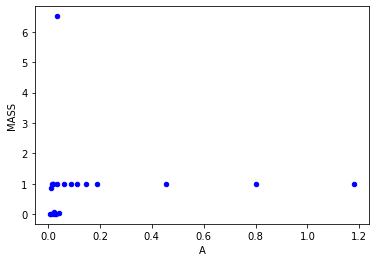

In [18]:
#Masa vs distancia planeta-estrella
zhh.plot(kind='scatter',x='A',y='MASS',color='blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002935D3E5F40>]],
      dtype=object)

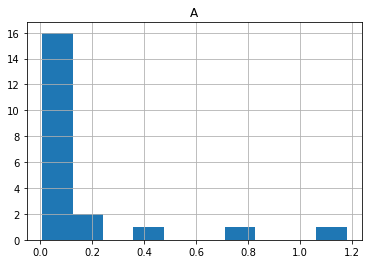

In [19]:
#Histograma
zhh.hist(column="A")

La tabla de datos no muestra valores para la densidad para las estrellas en la zona de habitabilidad


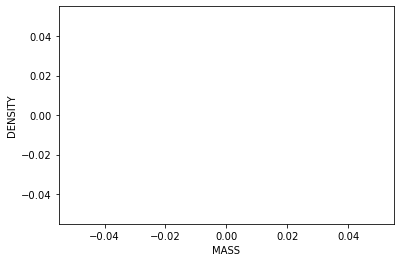

In [26]:
#Densidad vs masa
zhh.plot(kind='scatter',x='MASS',y='DENSITY',color='blue') 
print("La tabla de datos no muestra valores para la densidad para las estrellas en la zona de habitabilidad")

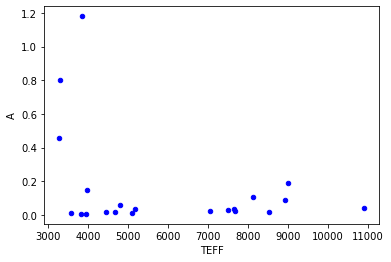

In [27]:
#Distancia vs temperatura efectiva
zhh.plot(kind='scatter',x='TEFF',y='A',color='blue')